In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Transformations


In [2]:
# Train transformations
train_transforms = transforms.Compose([
                                       transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomHorizontalFlip(p=0.3),
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,1,1)),
                                       transforms.ToTensor(),
                                       transforms.Normalize( (0.49139968, 0.48215827 ,0.44653124), (0.24703233, 0.24348505, 0.26158768) ), # The mean and std
                                       ])

# Test transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.49139968, 0.48215827 ,0.44653124), (0.24703233, 0.24348505, 0.26158768)), # The mean and std
                                       ])


# Dataset and Creating Train/Test Split

In [3]:
train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


# Dataloader Arguments & Test/Train Dataloaders


In [5]:

cuda = torch.cuda.is_available()
print("CUDA Available: ", cuda)


dataloader_args = dict(shuffle=True, batch_size=128, num_workers=2, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available:  True


In [1]:
import sys
from pathlib import Path

In [2]:
import os


In [10]:
FILE = Path(os.getcwd()).resolve()
ROOT = FILE.parents[0]  # project root directory
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))  # add ROOT to PATH

In [12]:
import src.model
import src.utils

from src.model import *
from src.utils import *

## Sample Images

It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

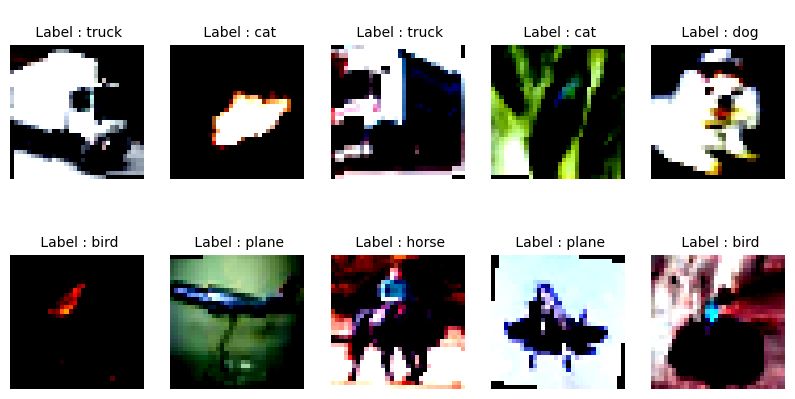

In [7]:
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

show_images(train_loader)

# Model Params


In [8]:
#!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net(norm='GN').to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
         GroupNorm-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 10, 32, 32]             160
        MaxPool2d-10           [-1, 10, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           1,440
             ReLU-12           [-1, 16, 16, 16]               0
        GroupNorm-13           [-1, 16, 16, 16]              32
          Dropout-14           [-1

# Training and Testing


In [9]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

# Train and Test of our model

In [10]:

model =  Net(norm='GN').to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1 )
    train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)
    test(model, device, test_loader,test_losses, test_acc)

EPOCH: 1


Loss=1.5456295013427734 Batch_id=390 Accuracy=35.88: 100%|██████████| 391/391 [01:04<00:00,  6.08it/s]



Test set: Average loss: 1.4996, Accuracy: 4590/10000 (45.90%)

EPOCH: 2


Loss=1.4013028144836426 Batch_id=390 Accuracy=50.21: 100%|██████████| 391/391 [01:01<00:00,  6.35it/s]



Test set: Average loss: 1.2301, Accuracy: 5490/10000 (54.90%)

EPOCH: 3


Loss=1.1384862661361694 Batch_id=390 Accuracy=56.39: 100%|██████████| 391/391 [01:00<00:00,  6.48it/s]



Test set: Average loss: 1.1000, Accuracy: 6074/10000 (60.74%)

EPOCH: 4


Loss=0.8333005905151367 Batch_id=390 Accuracy=59.76: 100%|██████████| 391/391 [00:59<00:00,  6.56it/s]



Test set: Average loss: 1.0748, Accuracy: 6168/10000 (61.68%)

EPOCH: 5


Loss=0.8420909643173218 Batch_id=390 Accuracy=61.97: 100%|██████████| 391/391 [00:59<00:00,  6.53it/s]



Test set: Average loss: 0.9830, Accuracy: 6560/10000 (65.60%)

EPOCH: 6


Loss=1.170851469039917 Batch_id=390 Accuracy=64.45: 100%|██████████| 391/391 [01:00<00:00,  6.50it/s] 



Test set: Average loss: 0.9944, Accuracy: 6439/10000 (64.39%)

EPOCH: 7


Loss=0.9850961565971375 Batch_id=390 Accuracy=65.55: 100%|██████████| 391/391 [00:59<00:00,  6.54it/s]



Test set: Average loss: 0.8767, Accuracy: 6891/10000 (68.91%)

EPOCH: 8


Loss=0.9734427332878113 Batch_id=390 Accuracy=67.24: 100%|██████████| 391/391 [01:01<00:00,  6.41it/s]



Test set: Average loss: 0.8851, Accuracy: 6897/10000 (68.97%)

EPOCH: 9


Loss=1.156679630279541 Batch_id=390 Accuracy=68.14: 100%|██████████| 391/391 [00:59<00:00,  6.59it/s] 



Test set: Average loss: 0.8193, Accuracy: 7143/10000 (71.43%)

EPOCH: 10


Loss=0.8020833134651184 Batch_id=390 Accuracy=69.32: 100%|██████████| 391/391 [00:59<00:00,  6.52it/s]



Test set: Average loss: 0.8115, Accuracy: 7161/10000 (71.61%)

EPOCH: 11


Loss=0.7749733924865723 Batch_id=390 Accuracy=70.15: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s]



Test set: Average loss: 0.7814, Accuracy: 7235/10000 (72.35%)

EPOCH: 12


Loss=0.7654221057891846 Batch_id=390 Accuracy=70.68: 100%|██████████| 391/391 [01:00<00:00,  6.47it/s]



Test set: Average loss: 0.7710, Accuracy: 7264/10000 (72.64%)

EPOCH: 13


Loss=0.786741316318512 Batch_id=390 Accuracy=71.62: 100%|██████████| 391/391 [00:59<00:00,  6.57it/s] 



Test set: Average loss: 0.7634, Accuracy: 7245/10000 (72.45%)

EPOCH: 14


Loss=0.9061557650566101 Batch_id=390 Accuracy=72.29: 100%|██████████| 391/391 [00:59<00:00,  6.55it/s]



Test set: Average loss: 0.7280, Accuracy: 7441/10000 (74.41%)

EPOCH: 15


Loss=0.7170712947845459 Batch_id=390 Accuracy=72.70: 100%|██████████| 391/391 [01:01<00:00,  6.35it/s] 



Test set: Average loss: 0.7513, Accuracy: 7349/10000 (73.49%)

EPOCH: 16


Loss=1.0079147815704346 Batch_id=390 Accuracy=73.41: 100%|██████████| 391/391 [01:02<00:00,  6.25it/s]



Test set: Average loss: 0.7129, Accuracy: 7528/10000 (75.28%)

EPOCH: 17


Loss=0.9663710594177246 Batch_id=390 Accuracy=73.92: 100%|██████████| 391/391 [01:00<00:00,  6.43it/s]



Test set: Average loss: 0.7024, Accuracy: 7575/10000 (75.75%)

EPOCH: 18


Loss=0.7190283536911011 Batch_id=390 Accuracy=73.94: 100%|██████████| 391/391 [00:59<00:00,  6.58it/s]



Test set: Average loss: 0.7043, Accuracy: 7545/10000 (75.45%)

EPOCH: 19


Loss=0.915865421295166 Batch_id=390 Accuracy=74.59: 100%|██████████| 391/391 [01:00<00:00,  6.51it/s]  



Test set: Average loss: 0.6819, Accuracy: 7655/10000 (76.55%)

EPOCH: 20


Loss=0.5751804113388062 Batch_id=390 Accuracy=75.20: 100%|██████████| 391/391 [01:00<00:00,  6.50it/s] 



Test set: Average loss: 0.6969, Accuracy: 7607/10000 (76.07%)



In [11]:
train_losses1 = [t.cpu().item() for t in train_losses]

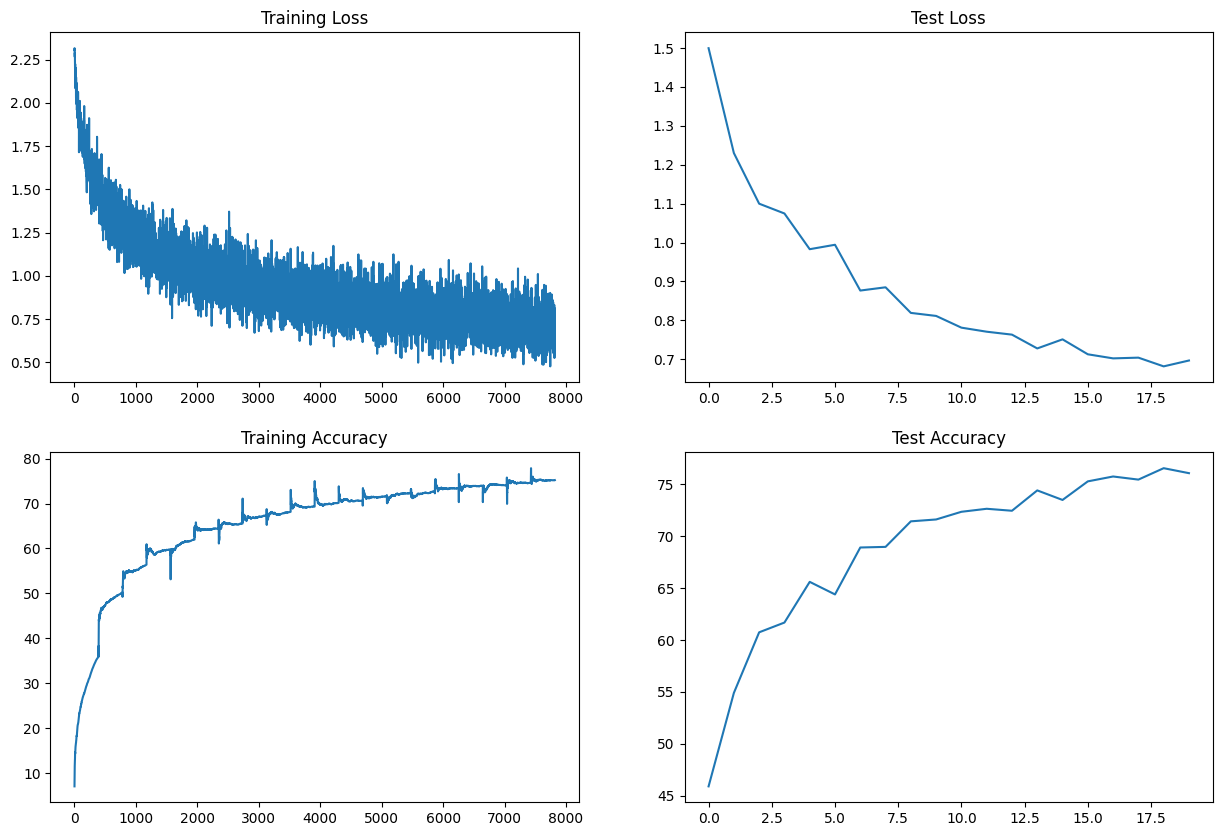

In [12]:
print_graph(train_losses1,train_acc, test_losses,test_acc)

In [13]:
wrong_prediction = []
model.eval()
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    output = model(images)
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    match = pred.eq(labels.view_as(pred)).to('cpu').numpy()
    for j, i in enumerate(match):
        if(i == False):
            wrong_prediction.append((images[j], pred[j].item(), labels[j].item()))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

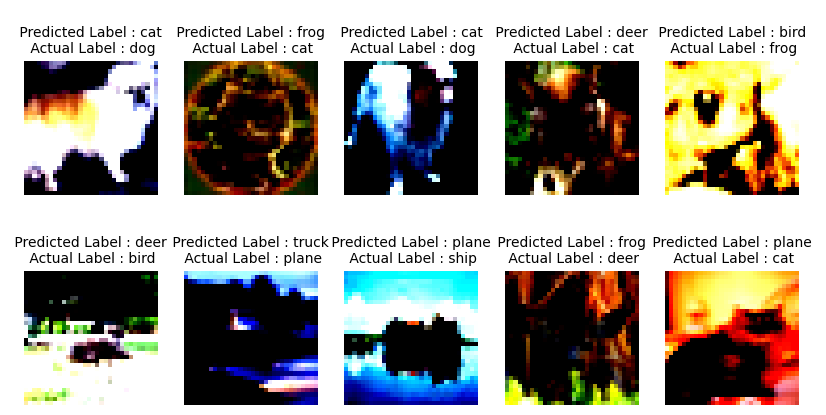

In [14]:
display_incorrect_images(wrong_prediction, n=10 )